In [1]:
import numpy as np
import re
import nltk
import pandas as pd
import nltk as nlp
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
stopWords = set(stopwords.words('turkish'))
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df_train = pd.read_csv('/content/train.csv', encoding= 'unicode_escape')
df_train.head()


In [3]:
df_test = pd.read_csv('/content/test.csv', encoding= 'unicode_escape')
df_test.head()

,Unnamed: 0,comment,Label
0,0,arkadaslar film bence cok güzel su anda gidile...,1
1,1,mükemmel bir film ve sonu enfes. mutlaka izley...,1
2,2,epey bi uzak durun diyorum..bu ne ya iyice cil...,0
3,3,"sürükleyici bir aksiyon, özellikle sonu çok sa...",1
4,4,hayatimda izledigim en berbat filmdi gerçekten...,0


In [4]:
def pre_processing(text):
    text = text.lower()  #Büyük harften -Küçük harfe çevirme
    text = re.sub("[^abcçdefgğhıijklmnoöprsştuüvyz]"," ",text)
    text=nltk.word_tokenize(text) # splits the words that are in the sentence from each other.
    text =[word for word in text if not word in set(stopwords.words("turkish"))]
    lemma=nlp.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text] # this code finds the root of the word for a word in the sentence and change them to their root form.
    text=" ".join(text)
    return text

In [6]:
import nltk

# تيليشارجي الملفات الناقصة
nltk.download('punkt_tab')
nltk.download('punkt')  # من الأحسن تزيد حتى هادا

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
df_train["clean_text"]=df_train["comment"].apply(lambda x: pre_processing(x))
df_test["clean_text"]=df_test["comment"].apply(lambda x: pre_processing(x))

In [8]:
df_train.head()


,Unnamed: 0,comment,Label,clean_text
0,0,biri bana bu filmde benim anlamadigim bisey ol...,0,bana filmde benim anlamadigim bisey oldugunu s...
1,1,ya çocuklar ilk filmin sonunda büyüdüler ya bu...,1,çocuklar ilk filmin sonunda büyüdüler filmde b...
2,2,film biraz daha uzun sürse harbi kiyameti göre...,0,film biraz uzun sürse harbi kiyameti görecektik
3,3,pek orjinal bi cinayet yok ama orjinal oyuncul...,0,pek orjinal bi cinayet yok orjinal oyuncular v...
4,4,film tek kelimeyle muhtesemdi heleki sonundaki...,1,film tek kelimeyle muhtesemdi heleki sonundaki...


In [9]:
X_train=df_train["clean_text"]
X_test=df_test["clean_text"]
y_train=df_train["Label"]
y_test=df_test["Label"]

print("x_train",X_train.shape)
print("x_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (7996,)
x_test (2666,)
y_train (7996,)
y_test (2666,)


In [10]:

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
LogisticRegression = Pipeline([('tfidf', TfidfVectorizer()),('clf', LogisticRegression())])

LogisticRegression .fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [11]:

def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    #print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(2), range(2))
    plt.xticks(range(2), range(2))
    plt.colorbar();
    for i in range(2):
        for j in range(2):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')

CV average score: 0.89
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1333
           1       0.90      0.88      0.89      1333

    accuracy                           0.89      2666
   macro avg       0.89      0.89      0.89      2666
weighted avg       0.89      0.89      0.89      2666

Train Accuracy : 0.951
Test Accuracy : 0.888
0.8880306162896499 : is the precision score
0.8878469617404351 : is the recall score
0.8878336896864445 : is the f1 score


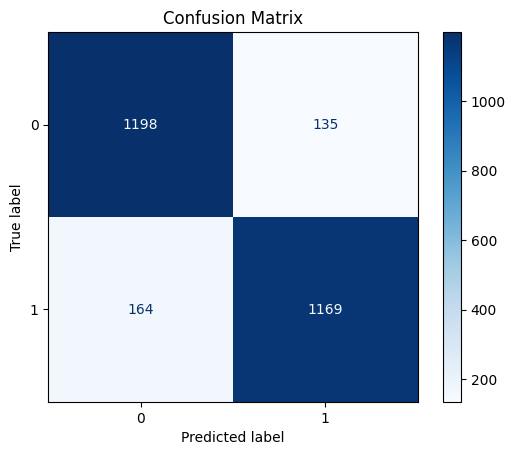

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# 1. Cross Validation
cv_scores = cross_val_score(LogisticRegression, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

# 2. Prediction & Classification Report
result = LogisticRegression.predict(X_test)
cr = classification_report(y_test, result)
print(cr)

# 3. Accuracy Scores
print('Train Accuracy : %.3f' % LogisticRegression.score(X_train, y_train))
print('Test Accuracy : %.3f' % LogisticRegression.score(X_test, y_test))

# 4. Detailed Metrics
y_pred = LogisticRegression.predict(X_test)
print(precision_score(y_test, y_pred, average='macro'), ": is the precision score")
print(recall_score(y_test, y_pred, average='macro'), ": is the recall score")
print(f1_score(y_test, y_pred, average='macro'), ": is the f1 score")

# 5. Plot Confusion Matrix (Hada howa lpartie li tsehhat)
# Plotting using the modern sklearn method
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [14]:
!pip install requests
!pip install html5lib
!pip install bs4

In [ ]:
import gradio as gr

# 1. Kansddu l-connections lqdam
gr.close_all()

# 2. Dalla d Tahlil (Mekkura w mziwna)
def advanced_analysis(text):
    if not text or text.strip() == "":
        return None, None

    try:
        # Pre-processing
        clean_text = pre_processing(text)

        # Prediction
        probs = LogisticRegression.predict_proba([clean_text])[0]
        prediction = LogisticRegression.predict([clean_text])[0]

        pos_score = float(probs[1])
        neg_score = float(probs[0])

        # Dictionary 3la qbl l-Mbyan (Chart)
        confidences = {
            "POSITIVE (İyi) ": pos_score,
            "NEGATIVE (Kötü) ": neg_score
        }

        # HTML Styling (Hna fin kyn zwaq)
        if prediction == 1:
            # Ila kan ZWIN: Khalfiya khdra
            html_result = f"""
            <div style="background-color: #d4edda; color: #155724; padding: 20px; border-radius: 10px; text-align: center; border: 2px solid #c3e6cb;">
                <h1 style="margin:0;"> FILM ZWIN (POSITIVE)</h1>
                <p style="font-size:18px;">Confidence: <b>{pos_score*100:.1f}%</b></p>
            </div>
            """
        else:
            # Ila kan KHAYB: Khalfiya hamra
            html_result = f"""
            <div style="background-color: #f8d7da; color: #721c24; padding: 20px; border-radius: 10px; text-align: center; border: 2px solid #f5c6cb;">
                <h1 style="margin:0;"> FILM KHAYB (NEGATIVE)</h1>
                <p style="font-size:18px;">Confidence: <b>{neg_score*100:.1f}%</b></p>
            </div>
            """

        return html_result, confidences

    except Exception as e:
        return f"Error: {str(e)}", None

# 3. Bina2 l-Interface b 'Blocks' (Professional Design)
# Hna kanqado stour w l-a3mida
with gr.Blocks(theme=gr.themes.Soft(primary_hue="blue"), title="Arayuz AI") as demo:

    # Header
    gr.Markdown(
        """
        #  Arayuz AI: Turkish Movie Analyzer
        <h3 style="text-align: center;">Ktb comment b Turkiya w chouf wach nass 3jbhom l-film wla la!</h3>
        """
    )

    # Row 1: Input & Button
    with gr.Row():
        with gr.Column(scale=4):
            input_text = gr.Textbox(
                label=" Commentaire (Yorum)",
                placeholder="Mela: 'Bu film hayatımda izlediğim en iyi filmdi...'",
                lines=2
            )
        with gr.Column(scale=1, min_width=100):
            analyze_btn = gr.Button(" T7lil (Analyze)", variant="primary", size="lg")

    # Row 2: Outputs (Resultat + Graph)
    with gr.Row():
        # Column 1: Natija b HTML (Alwan)
        with gr.Column():
            output_html = gr.HTML(label="Natija (Result)")

        # Column 2: Mbyan (Bar Chart)
        with gr.Column():
            output_graph = gr.Label(num_top_classes=2, label=" Nisab (Confidence Ratio)")

    # Action (Fach twrk 3la button)
    analyze_btn.click(
        fn=advanced_analysis,
        inputs=input_text,
        outputs=[output_html, output_graph]
    )

# 4. Launch (Inline f Colab)
demo.launch(share=False, debug=True)

Closing server running on port: 7860


/tmp/ipython-input-2105205501.py:53: DeprecationWarning: The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.
  with gr.Blocks(theme=gr.themes.Soft(primary_hue="blue"), title="Arayuz AI") as demo:


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.
* To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>